<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 7 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

Name : Md Ershadul Haque

Department: Mechanical, Aerospace, and Biomedical Engineering

# Problem 1 - Settings for decision making

The key element of decision making are:
- Objective(s)
- Reward(s)
- Actions
- States
- Value
- Policies

Select one topic (either from the list below, or use your own example) and identify what these elements can be:
- materials preparation by ceramic powder synthesis with XRay charatcerization of the product
- organic synthesis from known precursors
- growing tomatoes (or any other culture)
- playing chess
- choose your own

Answers:  

In the context of **playing chess**, the decision-making process can be understood using the same key elements of decision-making. Here's how each of them applies to chess:

- **Objective(s):** to checkmate the opponent’s king.

- **Reward(s):** Capturing an opponent's piece provides a material advantage. Gaining positional advantage, such as controlling the center of the board or forcing the opponent into a weakened position.

- **Actions:** Each turn, a player can choose one legal move from a set of options.

- **States:**  to the arrangement of pieces on the chessboard at any given time. It includes the position of all pieces, castling rights, whose turn it is, and other factors like the number of moves made.

- **Value:** can be thought of as how likely it is to lead to a win or a loss. Value is often estimated by assessing material (piece advantage), positional factors (control of the center, king safety), and other elements of the game.

- **Policies:** a strategy or set of rules that guides how a player decides on which move to make. It can be as simple as a heuristic (e.g., develop pieces early, control the center) or as complex as deep calculation or memorization of opening theory.

In [ ]:
pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148497 sha256=b5412b9e9897958485edec5fe8ba0584b3c5ce462e9bbef4539550b783603baa
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess


In [ ]:
import chess
import chess.engine

# Initialize the board
board = chess.Board()

# Define a simple function to evaluate the value of the current state
# based on material (reward system: higher piece value)
def evaluate_board(board):
    # Assign values to each piece
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9,
        chess.KING: 0  # King's value is set to 0 because the game ends when captured
    }
    value = 0
    # Evaluate white pieces
    for piece in chess.PIECE_TYPES:
        value += len(board.pieces(piece, chess.WHITE)) * piece_values[piece]
    # Subtract the value of black pieces (since they are the opponent's pieces)
    for piece in chess.PIECE_TYPES:
        value -= len(board.pieces(piece, chess.BLACK)) * piece_values[piece]

    return value

# Decision-making: Pick the best move based on capturing a high-value piece
def select_best_move(board):
    best_move = None
    best_value = -float('inf')  # Negative infinity as we want to maximize reward
    # Generate all legal moves
    for move in board.legal_moves:
        board.push(move)  # Make the move
        value = evaluate_board(board)  # Evaluate the resulting board
        board.pop()  # Undo the move

        # Choose the move that results in the best board state (highest value)
        if value > best_value:
            best_value = value
            best_move = move

    return best_move

# Run a simple loop where the engine plays both sides
def play_game():
    print(board)
    while not board.is_game_over():
        # Select a move for the current player (White or Black)
        move = select_best_move(board)
        print(f"\nBest move: {move}")
        board.push(move)
        print(board)

    # Print the result of the game
    if board.is_checkmate():
        print("Checkmate!")
    elif board.is_stalemate():
        print("Stalemate!")
    elif board.is_insufficient_material():
        print("Draw by insufficient material!")
    else:
        print("Game over.")

# Run the game
play_game()

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Best move: g1h3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R

Best move: g8h6
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R

Best move: h3g5
r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . N .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R

Best move: h8g8
r n b q k b r .
p p p p p p p p
. . . . . . . n
. . . . . . N .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R

Best move: g5h7
r n b q k b r .
p p p p p p p N
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R

Best move: g8h8
r n b q k b . r
p p p p p p p N
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R

B

# Problem 2 - More decision making

Pick a paper of your choice (or use the same papers as we used in Module 1) and identify the objectives, reward, etc.

Answers: In the paper (**29 card game**)

The 29 card game is a trick-taking card game that is popular in South Asia, particularly in India and Bangladesh. The game is typically played with four players in two teams, and it uses a modified deck of 32 cards (8s, 9s, 10s, Jacks, Queens, Kings, Aces, and 7s from each suit). The objective is to win tricks containing valuable cards to reach a target score of 29.

- **Objective(s):** to score 29 or more points through a series of tricks. Points are scored by winning tricks that contain high-value cards (Jacks, Nines, Aces, and Tens).

- **Reward(s):** Rewards in the form of points are derived from winning tricks that contain valuable cards. The card point values are: Jack 3 points, Nine 2 points,
Ace 1 point, Ten 1 point.

- **Actions:** the individual moves where each player plays a card from their hand. Each round of four cards played constitutes a "trick," with one team winning the trick based on game rules.

- **States:** is defined by the current hand (cards held by the players), the trump suit (if declared), and the outcome of previously played tricks.

- **Value:** can be understood as the potential score that a player can achieve based on their current hand and their team’s position relative to the opponent. Certain hands or cards in certain states are more valuable depending on the tricks already won.

- **Policies:** the strategy a player uses to decide which card to play in each state. This includes following certain rules like leading with the trump card, using high-value cards to win tricks, or playing low-value cards to lose on purpose in certain situations.

In [ ]:
import random

# Constants for card ranks and values
CARD_VALUES = {
    '7': 0, '8': 0, '9': 2, '10': 1, 'J': 3, 'Q': 0, 'K': 0, 'A': 1
}
SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
RANKS = ['7', '8', '9', '10', 'J', 'Q', 'K', 'A']

# Initialize deck of cards (32 cards in 29 game)
deck = [f'{rank} of {suit}' for suit in SUITS for rank in RANKS]

# Helper function to calculate the points from a trick
def calculate_trick_points(trick):
    points = 0
    for card in trick:
        rank = card.split()[0]
        points += CARD_VALUES[rank]
    return points

# Deal cards to 4 players
def deal_cards(deck):
    random.shuffle(deck)
    return [deck[i::4] for i in range(4)]

# Determine the winner of a trick based on the trump suit and lead suit
def determine_trick_winner(trick, trump_suit, lead_suit):
    winning_card = trick[0]
    winning_player = 0
    for i, card in enumerate(trick):
        card_suit = card.split()[-1]
        card_rank = card.split()[0]
        winning_card_rank = winning_card.split()[0]
        winning_card_suit = winning_card.split()[-1]

        # Trump suit overrides all
        if card_suit == trump_suit and winning_card_suit != trump_suit:
            winning_card = card
            winning_player = i
        # If same suit as lead suit, compare ranks
        elif card_suit == lead_suit and card_suit == winning_card_suit:
            if RANKS.index(card_rank) > RANKS.index(winning_card_rank):
                winning_card = card
                winning_player = i
    return winning_player

# Simulate playing the game
def play_game():
    players = ['Player 1', 'Player 2', 'Player 3', 'Player 4']
    hands = deal_cards(deck)

    # Display the hands
    for i, hand in enumerate(hands):
        print(f"{players[i]}'s hand: {', '.join(hand)}")

    trump_suit = random.choice(SUITS)
    print(f"\nTrump suit is: {trump_suit}\n")

    # Initialize scores
    team1_score, team2_score = 0, 0

    # Play 8 rounds (each round is a trick)
    for trick_num in range(8):
        print(f"Trick {trick_num + 1}:")

        # Players play a card from their hand (simple decision: random card for now)
        trick = []
        for i, hand in enumerate(hands):
            card = random.choice(hand)
            trick.append(card)
            hands[i].remove(card)
            print(f"{players[i]} plays {card}")

        # The first card played sets the lead suit
        lead_suit = trick[0].split()[-1]

        # Determine the winner of the trick
        winner = determine_trick_winner(trick, trump_suit, lead_suit)
        trick_points = calculate_trick_points(trick)

        print(f"\n{players[winner]} wins the trick with {trick_points} points\n")

        # Update team scores (Team 1: Player 1 & 3, Team 2: Player 2 & 4)
        if winner in [0, 2]:
            team1_score += trick_points
        else:
            team2_score += trick_points

    # Announce the result of the game
    print(f"\nFinal Score - Team 1: {team1_score}, Team 2: {team2_score}")
    if team1_score >= 29:
        print("Team 1 wins!")
    elif team2_score >= 29:
        print("Team 2 wins!")
    else:
        print("No team reached 29 points. Game is incomplete.")

# Run the game
play_game()

Player 1's hand: K of Hearts, Q of Diamonds, 8 of Diamonds, A of Diamonds, 10 of Clubs, 8 of Hearts, 7 of Spades, J of Diamonds
Player 2's hand: 10 of Diamonds, J of Clubs, 9 of Spades, 7 of Diamonds, K of Clubs, 7 of Clubs, K of Diamonds, A of Hearts
Player 3's hand: 10 of Hearts, 7 of Hearts, 9 of Clubs, 9 of Hearts, Q of Hearts, J of Hearts, 10 of Spades, Q of Clubs
Player 4's hand: Q of Spades, 8 of Clubs, K of Spades, A of Spades, J of Spades, 8 of Spades, A of Clubs, 9 of Diamonds

Trump suit is: Hearts

Trick 1:
Player 1 plays 8 of Hearts
Player 2 plays K of Clubs
Player 3 plays 9 of Hearts
Player 4 plays J of Spades

Player 3 wins the trick with 5 points

Trick 2:
Player 1 plays 7 of Spades
Player 2 plays 7 of Diamonds
Player 3 plays 7 of Hearts
Player 4 plays A of Spades

Player 3 wins the trick with 1 points

Trick 3:
Player 1 plays J of Diamonds
Player 2 plays 10 of Diamonds
Player 3 plays 10 of Hearts
Player 4 plays 8 of Spades

Player 3 wins the trick with 5 points

Trick 

# Problem 3 - Analysis with ChatGPT

Now try to perform the same analysis using the ChatGPT. You may want to define what you are looking for via prompt.

Answer:

# **Example of How to Structure a Full Analysis Using ChatGPT:**
**Prompt:** "Help me perform a full decision-making analysis for the 29 card game by explaining the key elements like objectives, rewards, actions, state evaluation, card values, and common strategies."

**ChatGPT's Expected Output:**

**Objective:**
The main objective in the 29 card game is for a team to score 29 points or more by winning tricks that contain valuable cards. The game is played with 32 cards (from the ranks 7 to Ace of each suit), and the two teams compete over 8 tricks to collect as many points as possible. Players from the same team work together to win key tricks while preventing the opposing team from doing the same.

**Rewards:**
The reward system is based on the card values. The point distribution is as follows: Jack 3 points, Nine 2 points, Ace 1 point, Ten 1 point and Other cards (7, 8, Queen, and King) do not contribute to points. Winning tricks that contain Jacks, Nines, Aces, and Tens is critical to scoring. Players need to identify when to use valuable cards in their hand to secure these high-point tricks.

**Actions:**
During each trick, players can choose one card to play from their hand. The lead player determines the suit for the trick, and subsequent players must follow that suit if they have it. If a player doesn’t have the lead suit, they can either play a trump card (if one is available) or a card from another suit. Deciding when to use a trump card or hold onto it for a later, more important trick is a key decision. Bluffing and discarding low-value cards at the right time are also part of the strategic actions.

**State Evaluation:**
The state of the game is determined by several factors:

* The cards in each player’s hand.
* The trump suit, which overrides all other suits.
* The cards played in previous tricks.
* The points accumulated by each team. Players must continuously evaluate these factors to decide which card to play next. For example, if many trump cards have already been played, holding onto high-value non-trump cards may become a stronger move.

**Value of Cards:**
Players assign values to the cards in their hand based on how likely they are to contribute to winning a trick. High-value cards like Jacks, Nines, and Aces are generally prioritized for winning key tricks. However, the value of a card also depends on the state of the game. For example, a trump Jack is worth more than a non-trump Jack when it comes to winning a trick.

**Policies (Strategies):**
Players often adopt various strategies to maximize their chances of winning:

* Trump Strategy: Players may lead with trump cards to win tricks outright, but they may also hold back trump cards for critical moments.
* Suit Management: Players should be mindful of which suits they have a strong hand in, and they may try to deplete their opponents' cards in that suit.
* Team Coordination: Communication and coordination between teammates are essential. Players may purposely lose a trick to allow their teammate to play a stronger card and win a future trick.
* Bluffing and Discarding: When a player has no high-value card to win a trick, they may discard low-value cards to mislead opponents about the strength of their hand or force their opponents to use a trump card unnecessarily.

# Problem 4 - Building a casino

Define the Casino with the 3 Bandits with the probabilities of win being given by Gaussian distributions with the parameters (mean, dispersion) being (6, 2) for the first one (A), (5,3) for the second one (B), and (5.5, 0.2) for the third one (C). You can adapt the code from the example notebook.

Pulled Bandit A: Reward = 5.07
Pulled Bandit B: Reward = 4.85
Pulled Bandit C: Reward = 5.58
Pulled Bandit A: Reward = 6.10
Pulled Bandit B: Reward = 11.25
Pulled Bandit C: Reward = 5.14
Pulled Bandit A: Reward = 5.31
Pulled Bandit B: Reward = 4.72
Pulled Bandit C: Reward = 5.42
Pulled Bandit A: Reward = 4.90
Pulled Bandit B: Reward = 3.12
Pulled Bandit C: Reward = 5.38
Pulled Bandit A: Reward = 5.15
Pulled Bandit B: Reward = 11.07
Pulled Bandit C: Reward = 5.35
Pulled Bandit A: Reward = 5.44
Pulled Bandit B: Reward = 1.62
Pulled Bandit C: Reward = 5.85
Pulled Bandit A: Reward = 4.74
Pulled Bandit B: Reward = 1.86
Pulled Bandit C: Reward = 5.40
Pulled Bandit A: Reward = 4.48
Pulled Bandit B: Reward = 3.34
Pulled Bandit C: Reward = 5.44
Pulled Bandit A: Reward = 5.75
Pulled Bandit B: Reward = 7.29
Pulled Bandit C: Reward = 5.74
Pulled Bandit A: Reward = 4.72
Pulled Bandit B: Reward = 6.91
Pulled Bandit C: Reward = 5.08
Pulled Bandit A: Reward = 5.68
Pulled Bandit B: Reward = 6.03
Pulled

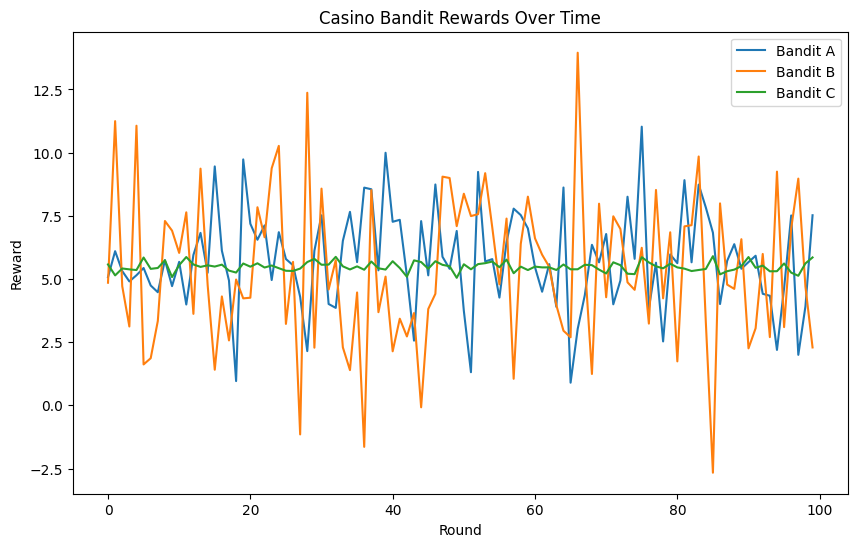

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit class to represent a slot machine (gaussian distribution)
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion

    # Simulate pulling the bandit's lever, returning a random reward from a Gaussian distribution
    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

# Define the Casino class that contains multiple bandits
class Casino:
    def __init__(self):
        # Initialize the bandits with the given mean and dispersion
        self.bandits = {
            "A": Bandit(6, 2),    # Bandit A: (mean = 6, dispersion = 2)
            "B": Bandit(5, 3),    # Bandit B: (mean = 5, dispersion = 3)
            "C": Bandit(5.5, 0.2) # Bandit C: (mean = 5.5, dispersion = 0.2)
        }

    # Simulate pulling the lever of a specific bandit
    def pull_bandit(self, bandit_name):
        if bandit_name in self.bandits:
            reward = self.bandits[bandit_name].pull()
            print(f"Pulled Bandit {bandit_name}: Reward = {reward:.2f}")
            return reward
        else:
            print("Invalid Bandit!")
            return None

# Define a function to simulate playing the bandits multiple times
def simulate_casino(casino, num_rounds):
    results = {"A": [], "B": [], "C": []}

    for i in range(num_rounds):
        for bandit_name in results.keys():
            reward = casino.pull_bandit(bandit_name)
            results[bandit_name].append(reward)

    return results

# Plot the results of playing each bandit
def plot_results(results):
    plt.figure(figsize=(10, 6))

    for bandit_name, rewards in results.items():
        plt.plot(rewards, label=f"Bandit {bandit_name}")

    plt.title("Casino Bandit Rewards Over Time")
    plt.xlabel("Round")
    plt.ylabel("Reward")
    plt.legend()
    plt.show()

# Main Function: Create the casino, simulate pulls, and plot results
def main():
    # Create a casino with 3 bandits
    casino = Casino()

    # Simulate pulling each bandit's lever 100 times
    num_rounds = 100
    results = simulate_casino(casino, num_rounds)

    # Plot the results
    plot_results(results)

# Run the main function
if __name__ == "__main__":
    main()

Now let's assume that we playing these in parallel. For a single run, calculate the average and dispecrion of cumulative reward as a number of plays. Plot the mean with error bars (dispersion) on the log scale for time. At which point can we decide which of the bandits gives biggest wins?

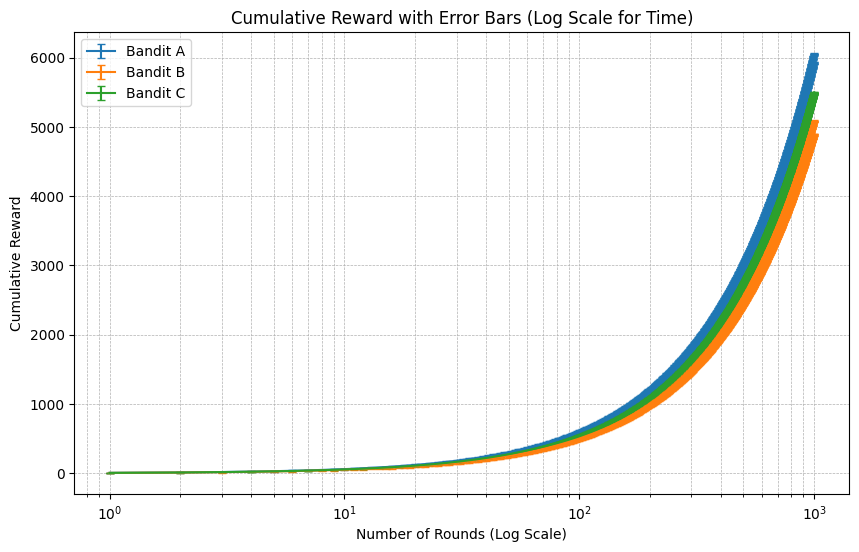

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit class to represent a slot machine (gaussian distribution)
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion

    # Simulate pulling the bandit's lever, returning a random reward from a Gaussian distribution
    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

# Define the Casino class that contains multiple bandits
class Casino:
    def __init__(self):
        # Initialize the bandits with the given mean and dispersion
        self.bandits = {
            "A": Bandit(6, 2),    # Bandit A: (mean = 6, dispersion = 2)
            "B": Bandit(5, 3),    # Bandit B: (mean = 5, dispersion = 3)
            "C": Bandit(5.5, 0.2) # Bandit C: (mean = 5.5, dispersion = 0.2)
        }

    # Simulate pulling the lever of a specific bandit
    def pull_bandit(self, bandit_name):
        if bandit_name in self.bandits:
            reward = self.bandits[bandit_name].pull()
            return reward
        else:
            return None

# Simulate playing the bandits in parallel for multiple trials and rounds
def simulate_casino_parallel(casino, num_rounds, num_trials):
    cumulative_rewards = {bandit_name: np.zeros((num_trials, num_rounds)) for bandit_name in casino.bandits.keys()}

    for trial in range(num_trials):
        for bandit_name in cumulative_rewards.keys():
            total_reward = 0
            for round_num in range(num_rounds):
                reward = casino.pull_bandit(bandit_name)
                total_reward += reward
                cumulative_rewards[bandit_name][trial, round_num] = total_reward

    return cumulative_rewards

# Calculate mean and standard deviation for each bandit's cumulative reward over trials
def calculate_statistics(cumulative_rewards):
    stats = {}
    for bandit_name, rewards in cumulative_rewards.items():
        mean_rewards = np.mean(rewards, axis=0)
        std_rewards = np.std(rewards, axis=0)
        stats[bandit_name] = {"mean": mean_rewards, "std": std_rewards}
    return stats

# Plot the mean and standard deviation (error bars) of cumulative rewards on a log scale
def plot_results_with_error_bars(stats, num_rounds):
    rounds = np.arange(1, num_rounds + 1)

    plt.figure(figsize=(10, 6))

    for bandit_name, stat in stats.items():
        mean_rewards = stat["mean"]
        std_rewards = stat["std"]
        plt.errorbar(rounds, mean_rewards, yerr=std_rewards, label=f"Bandit {bandit_name}", capsize=3)

    plt.xscale("log")
    plt.yscale("linear")
    plt.title("Cumulative Reward with Error Bars (Log Scale for Time)")
    plt.xlabel("Number of Rounds (Log Scale)")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Main Function: Create the casino, simulate pulls in parallel, and plot results
def main():
    # Create a casino with 3 bandits
    casino = Casino()

    # Number of rounds (time steps) and trials (parallel runs)
    num_rounds = 1000
    num_trials = 1000  # Number of parallel simulations

    # Simulate playing bandits in parallel
    cumulative_rewards = simulate_casino_parallel(casino, num_rounds, num_trials)

    # Calculate the mean and standard deviation of cumulative rewards
    stats = calculate_statistics(cumulative_rewards)

    # Plot the results with error bars on a log scale for time
    plot_results_with_error_bars(stats, num_rounds)

# Run the main function
if __name__ == "__main__":
    main()

Now, let's assume that we **do not** know the probability distirbutions of wins, and have to decide which of the hands A, B, or C to play. First, realize the A/B testing strategy. Show the returns for 10, 30, 100, 300, 1000, 3000 test runs and 10000 total number of attempts


Running A/B test with 10 test runs...
Best bandit after 10 test runs: Bandit A with average reward 6.26
Total cumulative reward after 10000 attempts: 60390.46

Running A/B test with 30 test runs...
Best bandit after 30 test runs: Bandit A with average reward 5.84
Total cumulative reward after 10000 attempts: 59658.19

Running A/B test with 100 test runs...
Best bandit after 100 test runs: Bandit A with average reward 6.12
Total cumulative reward after 10000 attempts: 59956.20

Running A/B test with 300 test runs...
Best bandit after 300 test runs: Bandit A with average reward 6.14
Total cumulative reward after 10000 attempts: 59747.57

Running A/B test with 1000 test runs...
Best bandit after 1000 test runs: Bandit A with average reward 6.04
Total cumulative reward after 10000 attempts: 58351.06

Running A/B test with 3000 test runs...
Best bandit after 3000 test runs: Bandit A with average reward 5.99
Total cumulative reward after 10000 attempts: 55461.92


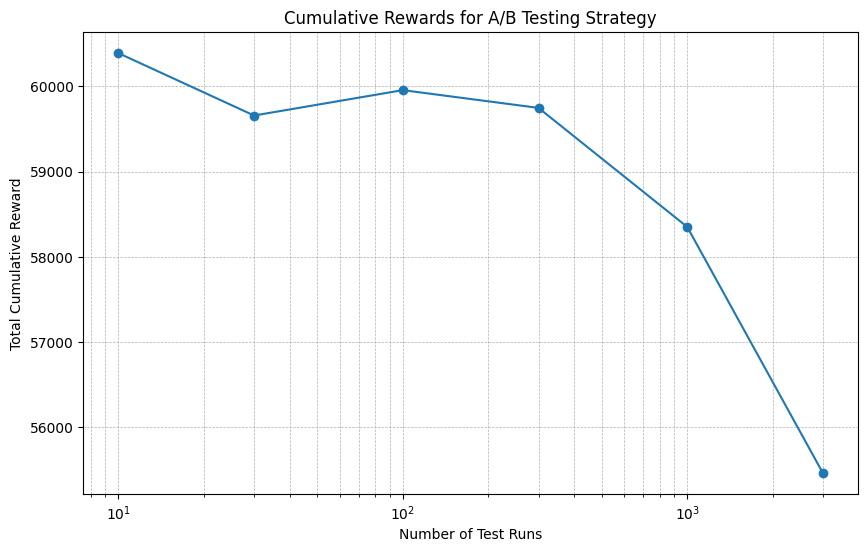

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit class to represent a slot machine (gaussian distribution)
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion

    # Simulate pulling the bandit's lever, returning a random reward from a Gaussian distribution
    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

# Define the Casino class that contains multiple bandits
class Casino:
    def __init__(self):
        # Initialize the bandits with the given mean and dispersion
        self.bandits = {
            "A": Bandit(6, 2),    # Bandit A: (mean = 6, dispersion = 2)
            "B": Bandit(5, 3),    # Bandit B: (mean = 5, dispersion = 3)
            "C": Bandit(5.5, 0.2) # Bandit C: (mean = 5.5, dispersion = 0.2)
        }

    # Simulate pulling the lever of a specific bandit
    def pull_bandit(self, bandit_name):
        if bandit_name in self.bandits:
            reward = self.bandits[bandit_name].pull()
            return reward
        else:
            return None

# A/B testing strategy
def ab_test_strategy(casino, total_attempts, test_runs_list):
    results = {}

    for test_runs in test_runs_list:
        print(f"\nRunning A/B test with {test_runs} test runs...")

        # Track rewards for each bandit during the test phase
        test_rewards = {"A": [], "B": [], "C": []}

        # Exploration phase: allocate test_runs equally among all bandits
        for bandit_name in test_rewards.keys():
            for _ in range(test_runs):
                reward = casino.pull_bandit(bandit_name)
                test_rewards[bandit_name].append(reward)

        # Calculate the average reward for each bandit after the test phase
        avg_rewards = {bandit_name: np.mean(rewards) for bandit_name, rewards in test_rewards.items()}

        # Select the bandit with the highest observed average reward
        best_bandit = max(avg_rewards, key=avg_rewards.get)
        print(f"Best bandit after {test_runs} test runs: Bandit {best_bandit} with average reward {avg_rewards[best_bandit]:.2f}")

        # Exploitation phase: Play the best bandit for the remaining attempts
        remaining_attempts = total_attempts - test_runs * 3
        cumulative_reward = sum([sum(rewards) for rewards in test_rewards.values()])  # Sum rewards from the test phase

        for _ in range(remaining_attempts):
            cumulative_reward += casino.pull_bandit(best_bandit)

        # Store the total cumulative reward for this run
        results[test_runs] = cumulative_reward
        print(f"Total cumulative reward after {total_attempts} attempts: {cumulative_reward:.2f}")

    return results

# Plot the results of the A/B testing strategy
def plot_ab_test_results(results):
    test_runs = list(results.keys())
    cumulative_rewards = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.plot(test_runs, cumulative_rewards, marker='o')
    plt.title("Cumulative Rewards for A/B Testing Strategy")
    plt.xlabel("Number of Test Runs")
    plt.ylabel("Total Cumulative Reward")
    plt.xscale("log")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Main Function: Run the A/B test strategy and plot results
def main():
    # Create a casino with 3 bandits
    casino = Casino()

    # Total number of attempts
    total_attempts = 10000

    # Different test run values to try
    test_runs_list = [10, 30, 100, 300, 1000, 3000]

    # Run A/B testing strategy
    results = ab_test_strategy(casino, total_attempts, test_runs_list)

    # Plot the results of cumulative rewards vs test runs
    plot_ab_test_results(results)

# Run the main function
if __name__ == "__main__":
    main()

Now realize the same exploration for the epsilon-greedy policy with several epsilon values

Running epsilon-greedy with epsilon = 0.01...
Cumulative reward for epsilon = 0.01: 59755.79
Running epsilon-greedy with epsilon = 0.05...
Cumulative reward for epsilon = 0.05: 59465.08
Running epsilon-greedy with epsilon = 0.1...
Cumulative reward for epsilon = 0.1: 59499.99
Running epsilon-greedy with epsilon = 0.2...
Cumulative reward for epsilon = 0.2: 59038.63
Running epsilon-greedy with epsilon = 0.3...
Cumulative reward for epsilon = 0.3: 58046.13
Running epsilon-greedy with epsilon = 0.5...
Cumulative reward for epsilon = 0.5: 57432.81


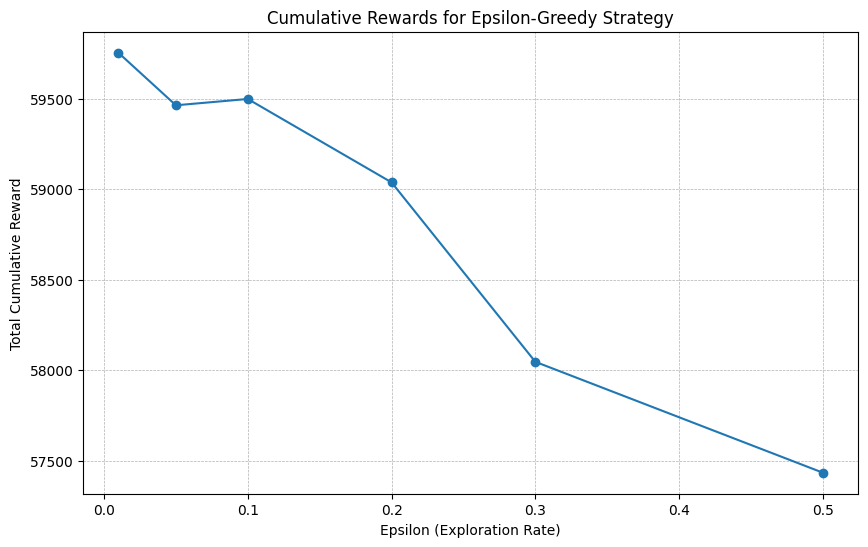

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit class to represent a slot machine (gaussian distribution)
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion
        self.estimated_reward = 0
        self.pull_count = 0

    # Simulate pulling the bandit's lever, returning a random reward from a Gaussian distribution
    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

    # Update the estimated reward using incremental update formula (to avoid storing all rewards)
    def update_estimated_reward(self, reward):
        self.pull_count += 1
        self.estimated_reward += (reward - self.estimated_reward) / self.pull_count

# Define the Casino class that contains multiple bandits
class Casino:
    def __init__(self):
        # Initialize the bandits with the given mean and dispersion
        self.bandits = {
            "A": Bandit(6, 2),    # Bandit A: (mean = 6, dispersion = 2)
            "B": Bandit(5, 3),    # Bandit B: (mean = 5, dispersion = 3)
            "C": Bandit(5.5, 0.2) # Bandit C: (mean = 5.5, dispersion = 0.2)
        }

    # Simulate pulling a bandit's lever using its name
    def pull_bandit(self, bandit_name):
        if bandit_name in self.bandits:
            reward = self.bandits[bandit_name].pull()
            return reward
        else:
            return None

# Epsilon-greedy strategy
def epsilon_greedy_strategy(casino, epsilon, total_attempts):
    cumulative_reward = 0
    bandit_rewards = {"A": [], "B": [], "C": []}

    # List of bandit names
    bandit_names = list(casino.bandits.keys())

    for _ in range(total_attempts):
        # Exploration: With probability epsilon, choose a random bandit
        if np.random.random() < epsilon:
            chosen_bandit = np.random.choice(bandit_names)
        else:
            # Exploitation: Choose the bandit with the highest estimated reward
            chosen_bandit = max(bandit_names, key=lambda b: casino.bandits[b].estimated_reward)

        # Pull the chosen bandit's lever and update the estimated reward
        reward = casino.pull_bandit(chosen_bandit)
        casino.bandits[chosen_bandit].update_estimated_reward(reward)

        # Track the cumulative reward
        cumulative_reward += reward
        bandit_rewards[chosen_bandit].append(reward)

    return cumulative_reward, bandit_rewards

# Run epsilon-greedy exploration for several epsilon values
def run_epsilon_greedy_experiments(casino, epsilon_values, total_attempts):
    results = {}

    for epsilon in epsilon_values:
        print(f"Running epsilon-greedy with epsilon = {epsilon}...")
        # Reset bandits' estimated rewards before each new experiment
        for bandit in casino.bandits.values():
            bandit.estimated_reward = 0
            bandit.pull_count = 0

        # Run the epsilon-greedy strategy
        cumulative_reward, _ = epsilon_greedy_strategy(casino, epsilon, total_attempts)

        # Store the results
        results[epsilon] = cumulative_reward
        print(f"Cumulative reward for epsilon = {epsilon}: {cumulative_reward:.2f}")

    return results

# Plot the results of epsilon-greedy strategy for different epsilon values
def plot_epsilon_greedy_results(results):
    epsilon_values = list(results.keys())
    cumulative_rewards = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_values, cumulative_rewards, marker='o')
    plt.title("Cumulative Rewards for Epsilon-Greedy Strategy")
    plt.xlabel("Epsilon (Exploration Rate)")
    plt.ylabel("Total Cumulative Reward")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Main Function: Run epsilon-greedy experiments and plot the results
def main():
    # Create a casino with 3 bandits
    casino = Casino()

    # Total number of attempts
    total_attempts = 10000

    # Different epsilon values to try
    epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

    # Run epsilon-greedy strategy for different epsilon values
    results = run_epsilon_greedy_experiments(casino, epsilon_values, total_attempts)

    # Plot the results of cumulative rewards vs epsilon values
    plot_epsilon_greedy_results(results)

# Run the main function
if __name__ == "__main__":
    main()

And finally UCB with several values of parameter beta.

Running UCB with beta = 0.1...
Cumulative reward for beta = 0.1: 54979.01
Running UCB with beta = 0.5...
Cumulative reward for beta = 0.5: 58436.54
Running UCB with beta = 1...
Cumulative reward for beta = 1: 59336.65
Running UCB with beta = 2...
Cumulative reward for beta = 2: 59905.90
Running UCB with beta = 5...
Cumulative reward for beta = 5: 59397.24
Running UCB with beta = 10...
Cumulative reward for beta = 10: 58783.21


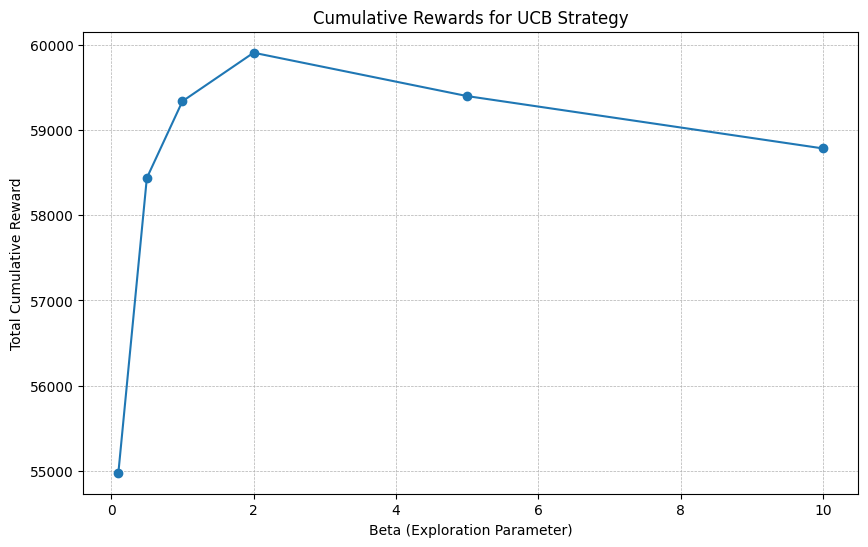

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit class to represent a slot machine (gaussian distribution)
class Bandit:
    def __init__(self, mean, dispersion):
        self.mean = mean
        self.dispersion = dispersion
        self.estimated_reward = 0
        self.pull_count = 0

    # Simulate pulling the bandit's lever, returning a random reward from a Gaussian distribution
    def pull(self):
        return np.random.normal(self.mean, self.dispersion)

    # Update the estimated reward using incremental update formula (to avoid storing all rewards)
    def update_estimated_reward(self, reward):
        self.pull_count += 1
        self.estimated_reward += (reward - self.estimated_reward) / self.pull_count

# Define the Casino class that contains multiple bandits
class Casino:
    def __init__(self):
        # Initialize the bandits with the given mean and dispersion
        self.bandits = {
            "A": Bandit(6, 2),    # Bandit A: (mean = 6, dispersion = 2)
            "B": Bandit(5, 3),    # Bandit B: (mean = 5, dispersion = 3)
            "C": Bandit(5.5, 0.2) # Bandit C: (mean = 5.5, dispersion = 0.2)
        }

    # Simulate pulling a bandit's lever using its name
    def pull_bandit(self, bandit_name):
        if bandit_name in self.bandits:
            reward = self.bandits[bandit_name].pull()
            return reward
        else:
            return None

# UCB strategy
def ucb_strategy(casino, beta, total_attempts):
    cumulative_reward = 0
    bandit_rewards = {"A": [], "B": [], "C": []}
    total_pulls = 0  # Count the total number of pulls for all bandits

    # Ensure that each bandit is pulled at least once initially
    for bandit_name in casino.bandits.keys():
        reward = casino.pull_bandit(bandit_name)
        casino.bandits[bandit_name].update_estimated_reward(reward)
        bandit_rewards[bandit_name].append(reward)
        cumulative_reward += reward
        total_pulls += 1

    # Continue playing using UCB strategy
    for _ in range(total_attempts - len(casino.bandits)):
        # Calculate the UCB value for each bandit
        ucb_values = {}
        for bandit_name, bandit in casino.bandits.items():
            if bandit.pull_count > 0:
                ucb_value = bandit.estimated_reward + beta * np.sqrt(np.log(total_pulls) / bandit.pull_count)
            else:
                ucb_value = float('inf')  # Encourage exploration if bandit hasn't been pulled yet
            ucb_values[bandit_name] = ucb_value

        # Choose the bandit with the highest UCB value
        chosen_bandit = max(ucb_values, key=ucb_values.get)

        # Pull the chosen bandit's lever and update the estimated reward
        reward = casino.pull_bandit(chosen_bandit)
        casino.bandits[chosen_bandit].update_estimated_reward(reward)

        # Track the cumulative reward
        cumulative_reward += reward
        bandit_rewards[chosen_bandit].append(reward)
        total_pulls += 1

    return cumulative_reward, bandit_rewards

# Run UCB exploration for several beta values
def run_ucb_experiments(casino, beta_values, total_attempts):
    results = {}

    for beta in beta_values:
        print(f"Running UCB with beta = {beta}...")
        # Reset bandits' estimated rewards before each new experiment
        for bandit in casino.bandits.values():
            bandit.estimated_reward = 0
            bandit.pull_count = 0

        # Run the UCB strategy
        cumulative_reward, _ = ucb_strategy(casino, beta, total_attempts)

        # Store the results
        results[beta] = cumulative_reward
        print(f"Cumulative reward for beta = {beta}: {cumulative_reward:.2f}")

    return results

# Plot the results of UCB strategy for different beta values
def plot_ucb_results(results):
    beta_values = list(results.keys())
    cumulative_rewards = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.plot(beta_values, cumulative_rewards, marker='o')
    plt.title("Cumulative Rewards for UCB Strategy")
    plt.xlabel("Beta (Exploration Parameter)")
    plt.ylabel("Total Cumulative Reward")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Main Function: Run UCB experiments and plot the results
def main():
    # Create a casino with 3 bandits
    casino = Casino()

    # Total number of attempts
    total_attempts = 10000

    # Different beta values to try
    beta_values = [0.1, 0.5, 1, 2, 5, 10]

    # Run UCB strategy for different beta values
    results = run_ucb_experiments(casino, beta_values, total_attempts)

    # Plot the results of cumulative rewards vs beta values
    plot_ucb_results(results)

# Run the main function
if __name__ == "__main__":
    main()

Disucss the relative merits and drawbacks for the A/B testing, epsilon-greedy, and USB.

### Summary of Merits and Drawbacks

| **Strategy**        | **Merits**                                                      | **Drawbacks**                                                  |
|---------------------|-----------------------------------------------------------------|---------------------------------------------------------------|
| **A/B Testing**     | - Simple, easy to implement<br>- No ongoing exploration<br>- Suitable for static environments | - Inefficient exploration<br>- Early commitment, could select wrong option<br>- No adaptive learning |
| **Epsilon-Greedy**  | - Continuous exploration<br>- Simple to implement<br>- Adapts to changes over time | - Random exploration, inefficient<br>- Fixed exploration rate<br>- May waste time on suboptimal choices |
| **UCB**             | - Optimized exploration<br>- Uses confidence bounds for better decisions<br>- Theoretically sound, minimizes regret | - Computationally more expensive<br>- Sensitive to parameter `beta`<br>- May delay exploitation early on |


**When to Use Each Strategy?**

**A/B Testing:**

* Best for static environments where you know the reward distributions won't change over time.
* Suitable when you have enough time for an initial test phase and you can commit to a single option after.
* Not ideal for cases where the environment might change dynamically, as it doesn’t adapt.

**Epsilon-Greedy:**

* Good for scenarios where you want a simple and adaptive algorithm that continuously balances exploration and exploitation.
* Works well when you expect some level of reward variability over time and need to keep exploring while also exploiting what works best.
* Not suitable when exploration efficiency is critical (e.g., when there's a high cost of exploring bad options).

**Upper Confidence Bound (UCB):**

* Excellent for situations where you need efficient exploration and exploitation, especially when computational complexity isn’t a big concern.
* Works best in environments where minimizing regret is important and you want to quickly hone in on the best option while accounting for uncertainty.
* May be overkill in simple or small problems where computational overhead or sensitivity to parameters could become drawbacks.

Ultimately, A/B testing offers a simple approach but lacks adaptability, epsilon-greedy is more flexible but explores inefficiently, and UCB is the most efficient in exploration-exploitation balance but can be more complex to tune and implement.